In [56]:
import pickle 
import itertools 

%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style()

In [2]:
import pickle

with open('fa_per_tract_res_inter.pickle', 'rb') as fid:
    fa_per_tract_res = pickle.load(fid)

with open('struct_mri_res_inter.pickle', 'rb') as fid:
    struct_mri_res = pickle.load(fid)
    
with open('combined_mri_res_inter.pickle', 'rb') as fid:
    combined_mri_res = pickle.load(fid)

In [51]:
fa_per_tract_res

{'rf': [{'Attention-Deficit/Hyperactivity Disorder': {'accuracy': 0.6113861386138614,
    'balanced_accuracy': 0.5764729620661824,
    'precision': 0.6357388316151202,
    'recall': 0.7838983050847458,
    'f1_score': 0.7020872865275143},
   'Anxiety Disorders': {'accuracy': 0.43564356435643564,
    'balanced_accuracy': 0.5295920920920921,
    'precision': 0.2841726618705036,
    'recall': 0.7314814814814815,
    'f1_score': 0.4093264248704664},
   'Specific Learning Disorder': {'accuracy': 0.47277227722772275,
    'balanced_accuracy': 0.5599264705882353,
    'precision': 0.18565400843881857,
    'recall': 0.6875,
    'f1_score': 0.292358803986711},
   'Autism Spectrum Disorder': {'accuracy': 0.5495049504950495,
    'balanced_accuracy': 0.5251529399868547,
    'precision': 0.15469613259668508,
    'recall': 0.49122807017543857,
    'f1_score': 0.2352941176470588},
   'Disruptive': {'accuracy': 0.3935643564356436,
    'balanced_accuracy': 0.4875,
    'precision': 0.1532567049808429,
   

In [3]:
# FA Per Tract 
fa_per_tract_rf_res = fa_per_tract_res['rf']
fa_per_tract_svm_res = fa_per_tract_res['svm']

rf_results = []

# Keep only f1-score per method
for split_results in fa_per_tract_rf_res: 
    for disorder, scores in split_results.items(): 
        rf_results.append([scores['f1_score'], disorder, 'RF'])
        
svm_results = []

for split_results in fa_per_tract_svm_res: 
    for disorder, scores in split_results.items(): 
        svm_results.append([scores['f1_score'], disorder, 'SVM'])
    

fa_per_tract_res_df_rf = pd.DataFrame(rf_results, columns=['f1_score', 'Disorder', 'Method'])
fa_per_tract_res_df_svm = pd.DataFrame(svm_results, columns=['f1_score', 'Disorder', 'Method'])

In [4]:
fa_per_tract_res_df_svm_m = fa_per_tract_res_df_svm.groupby('Disorder').median()
fa_per_tract_res_df_svm_m['Method'] = 'SVM'
fa_per_tract_res_df_svm_m

,f1_score,Method
Disorder,,
Anxiety Disorders,0.415519,SVM
Attention-Deficit/Hyperactivity Disorder,0.394444,SVM
Autism Spectrum Disorder,0.256251,SVM
Communication Disorder,0.214155,SVM
Depressive Disorders,0.237109,SVM
Disruptive,0.296095,SVM
Specific Learning Disorder,0.273788,SVM


In [5]:
fa_per_tract_res_df_rf_m = fa_per_tract_res_df_rf.groupby('Disorder').median()
fa_per_tract_res_df_rf_m['Method'] = 'RF'
fa_per_tract_res_df_rf_m

,f1_score,Method
Disorder,,
Anxiety Disorders,0.405222,RF
Attention-Deficit/Hyperactivity Disorder,0.701326,RF
Autism Spectrum Disorder,0.229479,RF
Communication Disorder,0.197345,RF
Depressive Disorders,0.263076,RF
Disruptive,0.249292,RF
Specific Learning Disorder,0.273557,RF


In [6]:
fa_per_tract_res_df_best = pd.DataFrame(index=fa_per_tract_res_df_rf_m.index, columns = ['f1_score', 'Method'])

for disorder in fa_per_tract_res_df_best.index.tolist():
    if fa_per_tract_res_df_rf_m.loc[disorder]['f1_score'] > fa_per_tract_res_df_svm_m.loc[disorder]['f1_score']: 
        fa_per_tract_res_df_best.loc[disorder]['f1_score'] = fa_per_tract_res_df_rf_m.loc[disorder]['f1_score']
        fa_per_tract_res_df_best.loc[disorder]['Method'] = 'RF'
    else: 
        fa_per_tract_res_df_best.loc[disorder]['f1_score'] = fa_per_tract_res_df_svm_m.loc[disorder]['f1_score']
        fa_per_tract_res_df_best.loc[disorder]['Method'] = 'SVM'

fa_per_tract_res_df_best

,f1_score,Method
Disorder,,
Anxiety Disorders,0.415519,SVM
Attention-Deficit/Hyperactivity Disorder,0.701326,RF
Autism Spectrum Disorder,0.256251,SVM
Communication Disorder,0.214155,SVM
Depressive Disorders,0.263076,RF
Disruptive,0.296095,SVM
Specific Learning Disorder,0.273788,SVM


In [46]:
# FA Per Tract 
fa_per_tract_rf_res = fa_per_tract_res['rf']
fa_per_tract_svm_res = fa_per_tract_res['svm']

results = []

# Keep only f1-score per method
for rf_split_results, svm_split_results in zip(fa_per_tract_rf_res, fa_per_tract_svm_res): 
    for (rf_disorder, rf_scores), (svm_disorder, svm_scores) in zip(rf_split_results.items(), svm_split_results.items()): 
        if rf_disorder != svm_disorder: 
            print('Error!!!')
        if fa_per_tract_res_df_best.loc[rf_disorder]['Method'] == 'RF': 
            results.append([rf_scores['f1_score'], rf_disorder, 'RF'])
        else: 
            results.append([svm_scores['f1_score'], rf_disorder, 'SVM'])
        
fa_per_tract_res_df = pd.DataFrame(results, columns=['f1_score', 'Disorder', 'Method'])
fa_per_tract_res_df['Dataset'] = 'FA Per Tract'
fa_per_tract_res_df

,f1_score,Disorder,Method,Dataset
0,0.702087,Attention-Deficit/Hyperactivity Disorder,RF,FA Per Tract
1,0.417910,Anxiety Disorders,SVM,FA Per Tract
2,0.266304,Specific Learning Disorder,SVM,FA Per Tract
3,0.253165,Autism Spectrum Disorder,SVM,FA Per Tract
4,0.275676,Disruptive,SVM,FA Per Tract
...,...,...,...,...
65,0.278947,Specific Learning Disorder,SVM,FA Per Tract
66,0.253870,Autism Spectrum Disorder,SVM,FA Per Tract
67,0.295455,Disruptive,SVM,FA Per Tract
68,0.224561,Communication Disorder,SVM,FA Per Tract


In [39]:
# Structural MRI 
struct_mri_rf_res = struct_mri_res['rf']
struct_mri_svm_res = struct_mri_res['svm']

rf_results = []

# Keep only f1-score per method
for split_results in struct_mri_rf_res: 
    for disorder, scores in split_results.items(): 
        rf_results.append([scores['f1_score'], disorder, 'RF'])
        
svm_results = []

for split_results in struct_mri_svm_res: 
    for disorder, scores in split_results.items(): 
        svm_results.append([scores['f1_score'], disorder, 'SVM'])
    

struct_mri_res_df_rf = pd.DataFrame(rf_results, columns=['f1_score', 'Disorder', 'Method'])
struct_mri_res_df_svm = pd.DataFrame(svm_results, columns=['f1_score', 'Disorder', 'Method'])

In [40]:
struct_mri_res_df_svm_m = struct_mri_res_df_svm.groupby('Disorder').median()
struct_mri_res_df_svm_m['Method'] = 'SVM'
struct_mri_res_df_svm_m

,f1_score,Method
Disorder,,
Anxiety Disorders,0.243393,SVM
Attention-Deficit/Hyperactivity Disorder,0.572472,SVM
Autism Spectrum Disorder,0.000000,SVM
Communication Disorder,0.000000,SVM
Depressive Disorders,0.338297,SVM
Disruptive,0.078435,SVM
Specific Learning Disorder,0.080101,SVM


In [41]:
struct_mri_res_df_rf_m = struct_mri_res_df_rf.groupby('Disorder').median()
struct_mri_res_df_rf_m['Method'] = 'RF'
struct_mri_res_df_rf_m

,f1_score,Method
Disorder,,
Anxiety Disorders,0.200000,RF
Attention-Deficit/Hyperactivity Disorder,0.680024,RF
Autism Spectrum Disorder,0.025004,RF
Communication Disorder,0.039231,RF
Depressive Disorders,0.176509,RF
Disruptive,0.070588,RF
Specific Learning Disorder,0.128713,RF


In [42]:
struct_mri_res_df_best = pd.DataFrame(index=struct_mri_res_df_rf_m.index, columns = ['f1_score', 'Method'])

for disorder in struct_mri_res_df_best.index.tolist():
    if struct_mri_res_df_rf_m.loc[disorder]['f1_score'] > struct_mri_res_df_svm_m.loc[disorder]['f1_score']: 
        struct_mri_res_df_best.loc[disorder]['f1_score'] = struct_mri_res_df_rf_m.loc[disorder]['f1_score']
        struct_mri_res_df_best.loc[disorder]['Method'] = 'RF'
    else: 
        struct_mri_res_df_best.loc[disorder]['f1_score'] = struct_mri_res_df_svm_m.loc[disorder]['f1_score']
        struct_mri_res_df_best.loc[disorder]['Method'] = 'SVM'

struct_mri_res_df_best

,f1_score,Method
Disorder,,
Anxiety Disorders,0.243393,SVM
Attention-Deficit/Hyperactivity Disorder,0.680024,RF
Autism Spectrum Disorder,0.0250039,RF
Communication Disorder,0.0392308,RF
Depressive Disorders,0.338297,SVM
Disruptive,0.0784347,SVM
Specific Learning Disorder,0.128713,RF


In [45]:
# Structural MRI 
struct_mri_rf_res = struct_mri_res['rf']
struct_mri_svm_res = struct_mri_res['svm']

results = []

# Keep only f1-score per method
for rf_split_results, svm_split_results in zip(struct_mri_rf_res, struct_mri_svm_res): 
    for (rf_disorder, rf_scores), (svm_disorder, svm_scores) in zip(rf_split_results.items(), svm_split_results.items()): 
        if rf_disorder != svm_disorder: 
            print('Error!!!')
        if struct_mri_res_df_best.loc[rf_disorder]['Method'] == 'RF': 
            results.append([rf_scores['f1_score'], rf_disorder, 'RF'])
        else: 
            results.append([svm_scores['f1_score'], rf_disorder, 'SVM'])
        
struct_mri_res_df = pd.DataFrame(results, columns=['f1_score', 'Disorder', 'Method'])
struct_mri_res_df['Dataset'] = 'Structural MRI'
struct_mri_res_df

,f1_score,Disorder,Method,Dataset
0,0.703297,Attention-Deficit/Hyperactivity Disorder,RF,Structural MRI
1,0.240838,Anxiety Disorders,SVM,Structural MRI
2,0.099010,Specific Learning Disorder,RF,Structural MRI
3,0.000000,Autism Spectrum Disorder,RF,Structural MRI
4,0.050000,Disruptive,SVM,Structural MRI
...,...,...,...,...
65,0.138614,Specific Learning Disorder,RF,Structural MRI
66,0.000000,Autism Spectrum Disorder,RF,Structural MRI
67,0.102564,Disruptive,SVM,Structural MRI
68,0.074074,Communication Disorder,RF,Structural MRI


In [47]:
# Combined MRI 
combined_mri_rf_res = combined_mri_res['rf']
combined_mri_svm_res = combined_mri_res['svm']

rf_results = []

# Keep only f1-score per method
for split_results in combined_mri_rf_res: 
    for disorder, scores in split_results.items(): 
        rf_results.append([scores['f1_score'], disorder, 'RF'])
        
svm_results = []

for split_results in combined_mri_svm_res: 
    for disorder, scores in split_results.items(): 
        svm_results.append([scores['f1_score'], disorder, 'SVM'])
    

combined_mri_res_df_rf = pd.DataFrame(rf_results, columns=['f1_score', 'Disorder', 'Method'])
combined_mri_res_df_svm = pd.DataFrame(svm_results, columns=['f1_score', 'Disorder', 'Method'])

combined_mri_res_df_svm_m = combined_mri_res_df_svm.groupby('Disorder').median()
combined_mri_res_df_svm_m['Method'] = 'SVM'

combined_mri_res_df_rf_m = combined_mri_res_df_rf.groupby('Disorder').median()
combined_mri_res_df_rf_m['Method'] = 'RF'

In [48]:
combined_mri_res_df_best = pd.DataFrame(index=combined_mri_res_df_rf_m.index, columns = ['f1_score', 'Method'])

for disorder in combined_mri_res_df_best.index.tolist():
    if combined_mri_res_df_rf_m.loc[disorder]['f1_score'] > combined_mri_res_df_svm_m.loc[disorder]['f1_score']: 
        combined_mri_res_df_best.loc[disorder]['f1_score'] = combined_mri_res_df_rf_m.loc[disorder]['f1_score']
        combined_mri_res_df_best.loc[disorder]['Method'] = 'RF'
    else: 
        combined_mri_res_df_best.loc[disorder]['f1_score'] = combined_mri_res_df_svm_m.loc[disorder]['f1_score']
        combined_mri_res_df_best.loc[disorder]['Method'] = 'SVM'


# Structural MRI 
combined_mri_rf_res = combined_mri_res['rf']
combined_mri_svm_res = combined_mri_res['svm']

results = []

# Keep only f1-score per method
for rf_split_results, svm_split_results in zip(combined_mri_rf_res, combined_mri_svm_res): 
    for (rf_disorder, rf_scores), (svm_disorder, svm_scores) in zip(rf_split_results.items(), svm_split_results.items()): 
        if rf_disorder != svm_disorder: 
            print('Error!!!')
        if combined_mri_res_df_best.loc[rf_disorder]['Method'] == 'RF': 
            results.append([rf_scores['f1_score'], rf_disorder, 'RF'])
        else: 
            results.append([svm_scores['f1_score'], rf_disorder, 'SVM'])
        
combined_mri_res_df = pd.DataFrame(results, columns=['f1_score', 'Disorder', 'Method'])
combined_mri_res_df['Dataset'] = 'Combined MRI'
combined_mri_res_df

,f1_score,Disorder,Method,Dataset
0,0.671727,Attention-Deficit/Hyperactivity Disorder,RF,Combined MRI
1,0.419619,Anxiety Disorders,RF,Combined MRI
2,0.304688,Specific Learning Disorder,RF,Combined MRI
3,0.146341,Autism Spectrum Disorder,RF,Combined MRI
4,0.281250,Disruptive,RF,Combined MRI
...,...,...,...,...
65,0.268775,Specific Learning Disorder,RF,Combined MRI
66,0.158730,Autism Spectrum Disorder,RF,Combined MRI
67,0.236641,Disruptive,RF,Combined MRI
68,0.112994,Communication Disorder,RF,Combined MRI


In [49]:
# Join three tables 
joined_mri_res_df = fa_per_tract_res_df
joined_mri_res_df = joined_mri_res_df.merge(struct_mri_res_df, left_index=True, right_index=True)
joined_mri_res_df = joined_mri_res_df.merge(combined_mri_res_df, left_index=True, right_index=True)
joined_mri_res_df

,f1_score_x,Disorder_x,Method_x,Dataset_x,f1_score_y,Disorder_y,Method_y,Dataset_y,f1_score,Disorder,Method,Dataset
0,0.702087,Attention-Deficit/Hyperactivity Disorder,RF,FA Per Tract,0.703297,Attention-Deficit/Hyperactivity Disorder,RF,Structural MRI,0.671727,Attention-Deficit/Hyperactivity Disorder,RF,Combined MRI
1,0.417910,Anxiety Disorders,SVM,FA Per Tract,0.240838,Anxiety Disorders,SVM,Structural MRI,0.419619,Anxiety Disorders,RF,Combined MRI
2,0.266304,Specific Learning Disorder,SVM,FA Per Tract,0.099010,Specific Learning Disorder,RF,Structural MRI,0.304688,Specific Learning Disorder,RF,Combined MRI
3,0.253165,Autism Spectrum Disorder,SVM,FA Per Tract,0.000000,Autism Spectrum Disorder,RF,Structural MRI,0.146341,Autism Spectrum Disorder,RF,Combined MRI
4,0.275676,Disruptive,SVM,FA Per Tract,0.050000,Disruptive,SVM,Structural MRI,0.281250,Disruptive,RF,Combined MRI
...,...,...,...,...,...,...,...,...,...,...,...,...
65,0.278947,Specific Learning Disorder,SVM,FA Per Tract,0.138614,Specific Learning Disorder,RF,Structural MRI,0.268775,Specific Learning Disorder,RF,Combined MRI
66,0.253870,Autism Spectrum Disorder,SVM,FA Per Tract,0.000000,Autism Spectrum Disorder,RF,Structural MRI,0.158730,Autism Spectrum Disorder,RF,Combined MRI
67,0.295455,Disruptive,SVM,FA Per Tract,0.102564,Disruptive,SVM,Structural MRI,0.236641,Disruptive,RF,Combined MRI
68,0.224561,Communication Disorder,SVM,FA Per Tract,0.074074,Communication Disorder,RF,Structural MRI,0.112994,Communication Disorder,RF,Combined MRI


In [53]:
# Join three tables 
joined_mri_res_df = pd.concat((fa_per_tract_res_df, struct_mri_res_df, combined_mri_res_df), 
                             axis=0, ignore_index=True) 

joined_mri_res_df

,f1_score,Disorder,Method,Dataset
0,0.702087,Attention-Deficit/Hyperactivity Disorder,RF,FA Per Tract
1,0.417910,Anxiety Disorders,SVM,FA Per Tract
2,0.266304,Specific Learning Disorder,SVM,FA Per Tract
3,0.253165,Autism Spectrum Disorder,SVM,FA Per Tract
4,0.275676,Disruptive,SVM,FA Per Tract
...,...,...,...,...
205,0.268775,Specific Learning Disorder,RF,Combined MRI
206,0.158730,Autism Spectrum Disorder,RF,Combined MRI
207,0.236641,Disruptive,RF,Combined MRI
208,0.112994,Communication Disorder,RF,Combined MRI


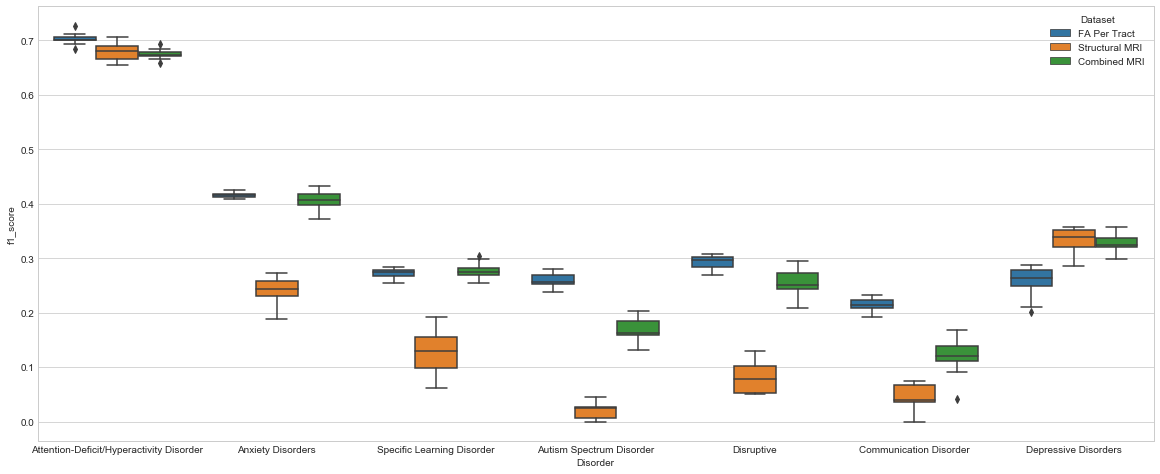

In [61]:
a4_dims = (20.0, 8.0)
fig, ax = plt.subplots(figsize=a4_dims)
box_plot = sns.boxplot(x="Disorder", y="f1_score", hue="Dataset", data=joined_mri_res_df, ax=ax)

## Construct Split 

In [64]:
import pickle

with open('fa_per_tract_res_inter.pickle', 'rb') as fid:
    fa_per_tract_res = pickle.load(fid)

with open('struct_mri_res_inter.pickle', 'rb') as fid:
    struct_mri_res = pickle.load(fid)
    
with open('combined_mri_res_inter.pickle', 'rb') as fid:
    combined_mri_res = pickle.load(fid)

In [77]:
most_common_disorders = ['Attention-Deficit/Hyperactivity Disorder', 'Anxiety Disorders', 'Specific Learning Disorder',
                         'Autism Spectrum Disorder', 'Disruptive', 'Communication Disorder',
                         'Depressive Disorders']

classifiers = ['svm', 'rf']

datasets = ['FA Per Tract', 'Structural MRI', 'Combined MRI']



In [78]:
no_datasets = len(datasets)
no_classifiers = len(classifiers)
no_cv_runs = 10
no_disorders = len(most_common_disorders)

data = np.empty((no_datasets, no_classifiers, no_cv_runs, no_disorders))

# FA Per Tract 
dataset_idx = 0

for estimator_idx, estimator in enumerate(classifiers): 
    for cv_run_idx in range(no_cv_runs): 
        for disorder_idx, disorder in enumerate(most_common_disorders): 
            data[dataset_idx, estimator_idx, cv_run_idx, disorder_idx] = fa_per_tract_res[estimator][cv_run_idx][disorder]['f1_score']

# Structural MRI 
dataset_idx = 1

for estimator_idx, estimator in enumerate(classifiers): 
    for cv_run_idx in range(no_cv_runs): 
        for disorder_idx, disorder in enumerate(most_common_disorders): 
            data[dataset_idx, estimator_idx, cv_run_idx, disorder_idx] = struct_mri_res[estimator][cv_run_idx][disorder]['f1_score']


# Combined MRI 
dataset_idx = 2

for estimator_idx, estimator in enumerate(classifiers): 
    for cv_run_idx in range(no_cv_runs): 
        for disorder_idx, disorder in enumerate(most_common_disorders): 
            data[dataset_idx, estimator_idx, cv_run_idx, disorder_idx] = combined_mri_res[estimator][cv_run_idx][disorder]['f1_score']
        

For FA Per Tract Attention-Deficit/Hyperactivity Disorder best classifier is rf with a score of 0.7031035929920725
For Structural MRI Attention-Deficit/Hyperactivity Disorder best classifier is rf with a score of 0.6797236077257216
For Combined MRI Attention-Deficit/Hyperactivity Disorder best classifier is rf with a score of 0.6749466149817721
For FA Per Tract Anxiety Disorders best classifier is svm with a score of 0.41556903573529047
For Structural MRI Anxiety Disorders best classifier is svm with a score of 0.24137344621557782
For Combined MRI Anxiety Disorders best classifier is rf with a score of 0.40467769907383716
For FA Per Tract Specific Learning Disorder best classifier is rf with a score of 0.2727311084053913
For Structural MRI Specific Learning Disorder best classifier is rf with a score of 0.125484525838515
For Combined MRI Specific Learning Disorder best classifier is rf with a score of 0.27672387075307875
For FA Per Tract Autism Spectrum Disorder best classifier is svm 

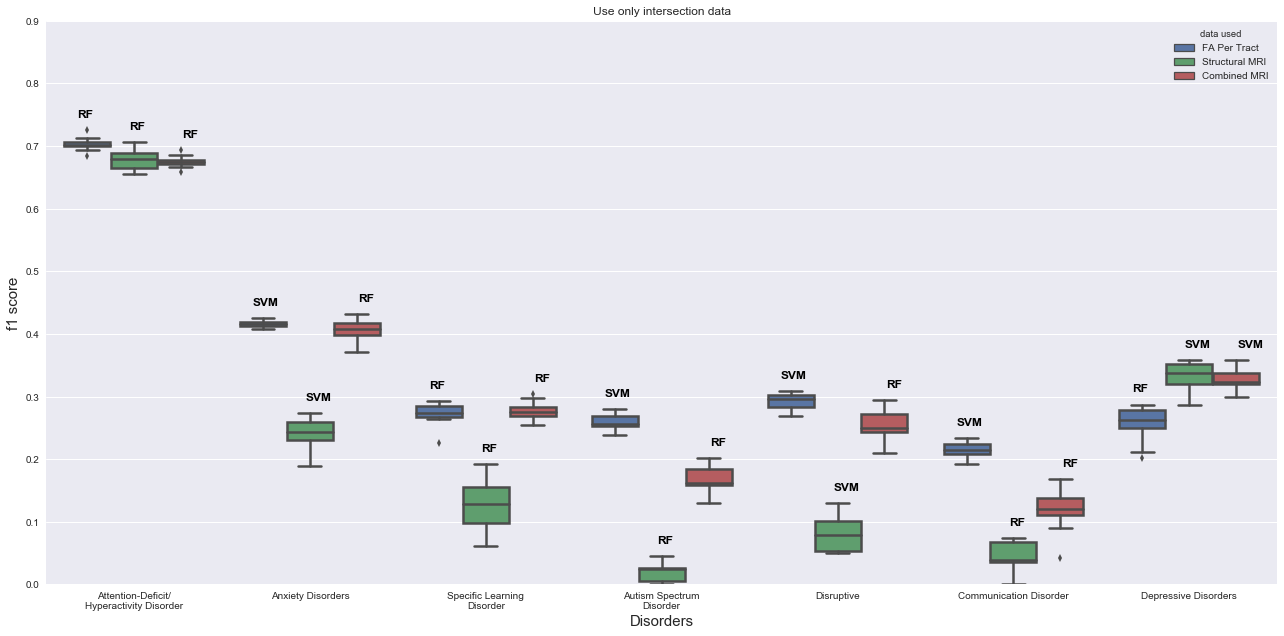

In [94]:
plot_only_data_from_intersection = True

data_df = pd.DataFrame(columns=["f1_score", "disorders", "data used", "classifier"])

best_classifiers = []
min_values = []
for most_common_disorder_i, most_common_disorder in enumerate(most_common_disorders):
    for data_configuration_i, data_configuration in enumerate(datasets):
        # find best classifier for the given problem
        median_values = np.mean(data[data_configuration_i, :, :, most_common_disorder_i], axis=1)

        best_classifier = np.argmax(median_values)
        best_classifier_name = classifiers[best_classifier]
        best_classifiers.append(best_classifier_name)
        min_values.append(np.max(data[data_configuration_i, best_classifier, :, most_common_disorder_i]))

        print('For', data_configuration, most_common_disorder, 'best classifier is', best_classifier_name, 'with a score of', median_values[best_classifier])

        for i in range(no_cv_runs):
            data_df = data_df.append({"f1_score": data[data_configuration_i, best_classifier, i, most_common_disorder_i],
                                      "disorders": most_common_disorder,
                                      "data used":  data_configuration,
                                      "classifier": best_classifier_name}, ignore_index=True)

fig, axes = plt.subplots(1, figsize=(18, 9))
sns.set()

sns.boxplot(x="disorders", y="f1_score", hue="data used", ax=axes, data=data_df, linewidth=2.5)
# sns.violinplot(x="disorders", y="f1_score", hue="data used", ax=axes, data=data_df, linewidth=2.5)

max_deviation = 0.3

pos = 0
add_pos = - max_deviation
total = 0
for clf, value in zip(best_classifiers, min_values):
    # print('position', pos + add_pos)
    axes.text(pos + add_pos - 0.025, value + 0.02, clf.upper(), horizontalalignment='left', color='black', weight='semibold', rotation=0)
    # print(total, len(data_configurations), total % len(data_configurations))
    
    if (total + 1) % len(datasets) == 0:
        pos += 1
        total = 0
        add_pos = - max_deviation
    else:
        add_pos += 2 * max_deviation / (len(datasets) - 1)
        total += 1

axes.set_ylim([0, 0.9])
if plot_only_data_from_intersection:
    axes.set_title('Use only intersection data')
    plt.savefig('intersetion_only.png')
else:
    axes.set_title('Train on all available data')
    plt.savefig('all_data.png')

most_common_disorders_labels = ['Attention-Deficit/\nHyperactivity Disorder', 'Anxiety Disorders', 'Specific Learning\nDisorder',
                                'Autism Spectrum\nDisorder', 'Disruptive', 'Communication Disorder', 'Depressive Disorders']
axes.set_xticklabels(most_common_disorders_labels)
# classifiers_explanations = {"RF": "RandomForest", "SVM": "Support Vector Machine"}
# text = "\n".join([k + ": " + v for k,v in zip(list(classifiers_explanations.keys()), list(classifiers_explanations.values()))])

# axes.text(len(most_common_disorders) - 1 + 0.45, 0.68, text, horizontalalignment='right', color='black', weight='semibold', rotation=0)

axes.set_xlabel('Disorders', fontsize=15)
axes.set_ylabel('f1 score', fontsize=15)

plt.tight_layout()
plt.show()

## All data

In [95]:
import pickle

with open('fa_per_tract_res.pickle', 'rb') as fid:
    fa_per_tract_res = pickle.load(fid)

with open('struct_mri_res.pickle', 'rb') as fid:
    struct_mri_res = pickle.load(fid)
    
with open('combined_mri_res.pickle', 'rb') as fid:
    combined_mri_res = pickle.load(fid)

FileNotFoundError: [Errno 2] No such file or directory: 'combined_mri_res.pickle'